<a href="https://colab.research.google.com/github/lolobq/ECGR-5105-Intro_To_Machine_Learning/blob/main/Homework2/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [619]:
# Import csv data from my GitHub repo
url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework2/Housing.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Code for Problem 1a.

In [620]:
# Split the data into training and validation sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_1a = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train_1a = df_train['price'].values.reshape(-1, 1)
x_val_1a = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_val_1a = df_test['price'].values.reshape(-1, 1)

In [621]:
# Add a bias term
x_b_train_1a = np.c_[np.ones((len(x_train_1a), 1)), x_train_1a]
x_b_val_1a = np.c_[np.ones((len(x_val_1a), 1)), x_val_1a]

# Initialize theta with 6 features (including bias term)
theta_1a = np.zeros((6, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_1a = 1000
m = len(x_b_train_1a)

In [622]:
def compute_losses(x_b_train, x_b_val, y_train, y_val, n_iterations, theta):
    """
    Computes cost for linear regression with training and validation data.

    Parameters:
    x_b_train : The features of the training data with the bias term included.
    x_b_val : The features of the validation data with the bias term included.
    y_train : The ground truth of the training data.
    y_val : The ground truth of the validation data.
    n_iterations : Number of times the losses are calculated.
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    train_losses : An array containing the computed training losses
    val_losses : An array containing the computed validation losses
    """
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        gradients = 2/m * x_b_train.T.dot(x_b_train.dot(theta) - y_train)
        theta -= learning_rate * gradients

        train_loss = (1/m) * np.sum(np.square(x_b_train.dot(theta) - y_train))
        val_loss = (1/len(x_b_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

In [623]:
def plot_losses(train_losses, val_losses):
    """
    Plots the training and validation losses against each other.

    Parameters:
    train_losses : An array containing the computed training losses
    val_losses : An array containing the computed validation losses
    """
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.legend()

    plt.title("Training and Validation Loss Over Iterations")
    plt.show()

In [624]:
def plot_feature_importance(feature_names, importance_values):
    """
    Creates a bar graph comparing the feature importance values.

    Parameters:
    feature_names : An array containing the names of the features used.
    importance_values : An array containing the theta values
    """
    importance_values = importance_values[1:] # Exclude the X0 value
    plt.bar(feature_names, importance_values)
    print(importance_values)
    # plt.bar(x=feature_names, height=importance_values, color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=len(feature_names))
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.xticks(rotation='vertical')
    plt.show()

<ipython-input-622-b4b0483c2967>:24: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(x_b_train.dot(theta) - y_train))
<ipython-input-622-b4b0483c2967>:25: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(x_b_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))
<ipython-input-622-b4b0483c2967>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


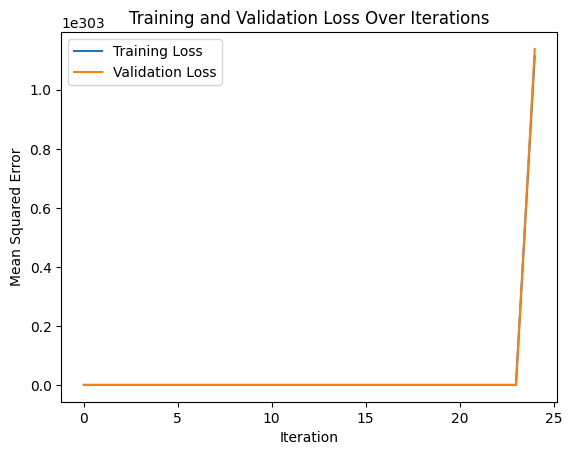

In [625]:
# Calculate the training and validation losses then plot them
train_losses_1a, val_losses_1a, theta_1a = compute_losses(x_b_train=x_b_train_1a, x_b_val=x_b_val_1a, y_train=y_train_1a, y_val=y_val_1a, n_iterations=n_iterations_1a, theta=theta_1a)
plot_losses(train_losses=train_losses_1a, val_losses=val_losses_1a)

# features_1a = np.array(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])
# plot_feature_importance(feature_names=features_1a, importance_values=theta_1a)

# Code for Problem 1b.

In [626]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_1b = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_1b = df_train['price'].values.reshape(-1, 1)
x_val_1b = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_1b = df_test['price'].values.reshape(-1, 1)

In [627]:
# Add a bias term
x_b_train_1b = np.c_[np.ones((len(x_train_1b), 1)), x_train_1b]
x_b_val_1b = np.c_[np.ones((len(x_val_1b), 1)), x_val_1b]

# Initialize theta with 6 features (including bias term)
theta_1b = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_1b = 60
m = len(x_b_train_1b)

<ipython-input-622-b4b0483c2967>:24: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(x_b_train.dot(theta) - y_train))
<ipython-input-622-b4b0483c2967>:25: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(x_b_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))
<ipython-input-622-b4b0483c2967>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


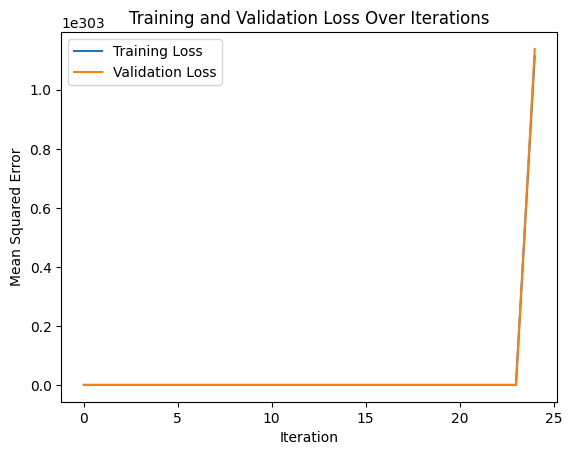

In [628]:
# Calculate the training and validation losses then plot them
train_losses_1b, val_losses_1b, theta_1b = compute_losses(x_b_train=x_b_train_1b, x_b_val=x_b_val_1b, y_train=y_train_1b, y_val=y_val_1b, n_iterations=n_iterations_1b, theta=theta_1b)
plot_losses(train_losses=train_losses_1b, val_losses=val_losses_1b)

# features_1b = np.array(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'])
# plot_feature_importance(feature_names=features_1a, importance_values=theta_1a)

# Code for Problem 2a.

Normalization

In [629]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_2a_n = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train_2a_n = df_train['price'].values.reshape(-1, 1)
x_val_2a_n = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_val_2a_n = df_test['price'].values.reshape(-1, 1)

# Scale the values
n_scaler = MinMaxScaler()
x_train_2a_n = n_scaler.fit_transform(x_train_2a_n)
x_val_2a_n = n_scaler.fit_transform(x_val_2a_n)

In [630]:
# Add a bias term
x_b_train_2a_n = np.c_[np.ones((len(x_train_2a_n), 1)), x_train_2a_n]
x_b_val_2a_n = np.c_[np.ones((len(x_val_2a_n), 1)), x_val_2a_n]

# Initialize theta with 6 features (including bias term)
theta_2a_n = np.zeros((6, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_2a_n = 300
m = len(x_b_train_2a_n)

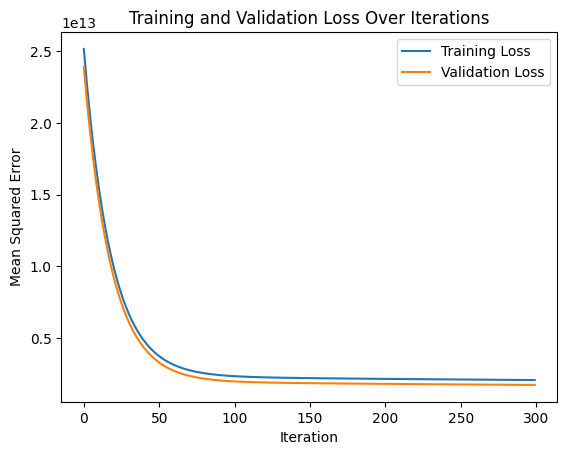

2070733547087.2356


In [631]:
# Calculate the training and validation losses then plot them
train_losses_2a_n, val_losses_2a_n, theta_2a_n = compute_losses(x_b_train=x_b_train_2a_n, x_b_val=x_b_val_2a_n, y_train=y_train_2a_n, y_val=y_val_2a_n, n_iterations=n_iterations_2a_n, theta=theta_2a_n)
plot_losses(train_losses=train_losses_2a_n, val_losses=val_losses_2a_n)

print(train_losses_2a_n[-1])


Standardization

In [632]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_2a_s = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train_2a_s = df_train['price'].values.reshape(-1, 1)
x_val_2a_s = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_val_2a_s = df_test['price'].values.reshape(-1, 1)

# Scale the values
s_scaler = StandardScaler()
x_train_2a_s = s_scaler.fit_transform(x_train_2a_s)
x_val_2a_s = s_scaler.fit_transform(x_val_2a_s)

In [633]:
# Add a bias term
x_b_train_2a_s = np.c_[np.ones((len(x_train_2a_s), 1)), x_train_2a_s]
x_b_val_2a_s = np.c_[np.ones((len(x_val_2a_s), 1)), x_val_2a_s]

# Initialize theta with 6 features (including bias term)
theta_2a_s = np.zeros((6, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_2a_s = 300
m = len(x_b_train_2a_s)

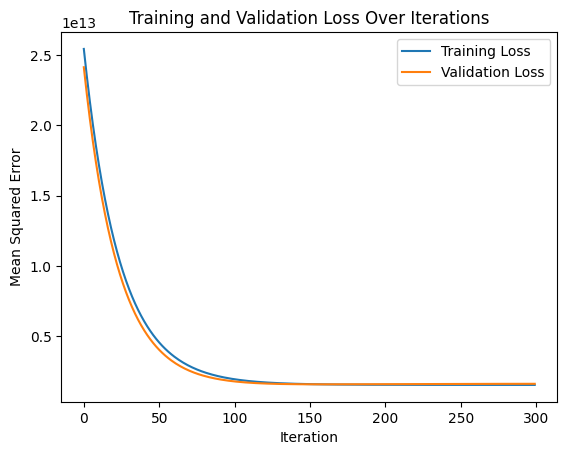

In [634]:
# Calculate the training and validation losses then plot them
train_losses_2a_s, val_losses_2a_s, theta_2a_s = compute_losses(x_b_train=x_b_train_2a_s, x_b_val=x_b_val_2a_s, y_train=y_train_2a_s, y_val=y_val_2a_s, n_iterations=n_iterations_2a_s, theta=theta_2a_s)
plot_losses(train_losses=train_losses_2a_s, val_losses=val_losses_2a_s)

# Code for Problem 2b.

Normalization

In [635]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_2b_n = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_2b_n = df_train['price'].values.reshape(-1, 1)
x_val_2b_n = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_2b_n = df_test['price'].values.reshape(-1, 1)

# Scale the values
n_scaler = MinMaxScaler()
x_train_2b_n = n_scaler.fit_transform(x_train_2b_n)
x_val_2b_n = n_scaler.fit_transform(x_val_2b_n)

In [636]:
# Add a bias term
x_b_train_2b_n = np.c_[np.ones((len(x_train_2b_n), 1)), x_train_2b_n]
x_b_val_2b_n = np.c_[np.ones((len(x_val_2b_n), 1)), x_val_2b_n]

# Initialize theta with 12 features (including bias term)
theta_2b_n = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_2b_n = 300
m = len(x_b_train_2b_n)

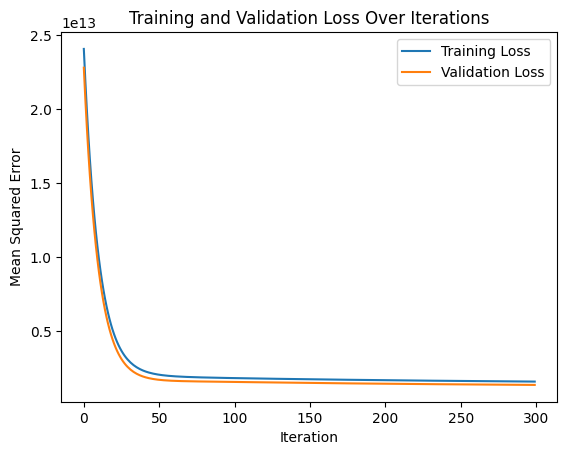

In [637]:
# Calculate the training and validation losses then plot them
train_losses_2b_n, val_losses_2b_n, theta_2b_n = compute_losses(x_b_train=x_b_train_2b_n, x_b_val=x_b_val_2b_n, y_train=y_train_2b_n, y_val=y_val_2b_n, n_iterations=n_iterations_2b_n, theta=theta_2b_n)
plot_losses(train_losses=train_losses_2b_n, val_losses=val_losses_2b_n)

Standardization

In [638]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_2b_s = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_2b_s = df_train['price'].values.reshape(-1, 1)
x_val_2b_s = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_2b_s = df_test['price'].values.reshape(-1, 1)

# Scale the values
s_scaler = StandardScaler()
x_train_2b_s = s_scaler.fit_transform(x_train_2b_s)
x_val_2b_s = s_scaler.fit_transform(x_val_2b_s)

In [639]:
# Add a bias term
x_b_train_2b_s = np.c_[np.ones((len(x_train_2b_s), 1)), x_train_2b_s]
x_b_val_2b_s = np.c_[np.ones((len(x_val_2b_s), 1)), x_val_2b_s]

# Initialize theta with 12 features (including bias term)
theta_2b_s = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_2b_s = 300
m = len(x_b_train_2b_s)

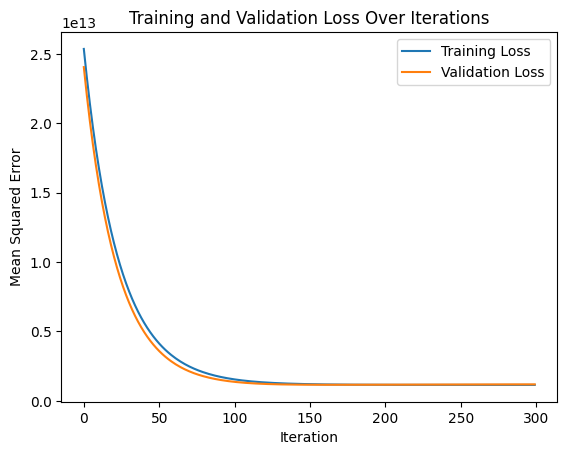

In [640]:
# Calculate the training and validation losses then plot them
train_losses_2b_s, val_losses_2b_s, theta_2b_s = compute_losses(x_b_train=x_b_train_2b_s, x_b_val=x_b_val_2b_s, y_train=y_train_2b_s, y_val=y_val_2b_s, n_iterations=n_iterations_2b_s, theta=theta_2b_s)
plot_losses(train_losses=train_losses_2b_s, val_losses=val_losses_2b_s)

# Code for Problem 3a.

In [641]:
def compute_losses_with_penalty(x_b_train, x_b_val, y_train, y_val, n_iterations, theta):
    """
    Computes cost for linear regression with training and validation data.

    Parameters:
    x_b_train : The features of the training data with the bias term included.
    x_b_val : The features of the validation data with the bias term included.
    y_train : The ground truth of the training data.
    y_val : The ground truth of the validation data.
    n_iterations : Number of times the losses are calculated.
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    train_losses : An array containing the computed training losses
    val_losses : An array containing the computed validation losses
    """
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        h_theta = x_b_train.dot(theta)
        gradients = 2/m * x_b_train.T.dot(h_theta - y_train)
        theta = theta*(1 - learning_rate * (lambd / m)) - (learning_rate * gradients)

        train_loss = (1/m) * np.sum(np.square(h_theta - y_train))
        val_loss = (1/len(x_b_val)) * np.sum(np.square(x_b_val.dot(theta) - y_val))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

Normalization

In [642]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_3a_n = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_3a_n = df_train['price'].values.reshape(-1, 1)
x_val_3a_n = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_3a_n = df_test['price'].values.reshape(-1, 1)

# Scale the values
n_scaler = MinMaxScaler()
x_train_3a_n = n_scaler.fit_transform(x_train_3a_n)
x_val_3a_n = n_scaler.fit_transform(x_val_3a_n)

In [643]:
# Add a bias term
x_b_train_3a_n = np.c_[np.ones((len(x_train_3a_n), 1)), x_train_3a_n]
x_b_val_3a_n = np.c_[np.ones((len(x_val_3a_n), 1)), x_val_3a_n]

# Initialize theta with 12 features (including bias term)
theta_3a_n = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_3a_n = 300
m = len(x_b_train_3a_n)
lambd = 5

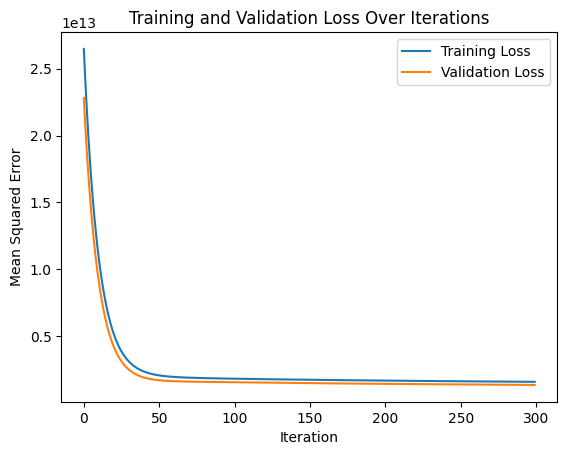

In [644]:
# Calculate the training and validation losses then plot them
train_losses_3a_n, val_losses_3a_n, theta_3a_n = compute_losses_with_penalty(x_b_train=x_b_train_3a_n, x_b_val=x_b_val_3a_n, y_train=y_train_3a_n, y_val=y_val_3a_n, n_iterations=n_iterations_3a_n, theta=theta_3a_n)
plot_losses(train_losses=train_losses_3a_n, val_losses=val_losses_3a_n)

Standardization

In [645]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_3a_s = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_3a_s = df_train['price'].values.reshape(-1, 1)
x_val_3a_s = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_3a_s = df_test['price'].values.reshape(-1, 1)

# Scale the values
s_scaler = StandardScaler()
x_train_3a_s = s_scaler.fit_transform(x_train_3a_s)
x_val_3a_s = s_scaler.fit_transform(x_val_3a_s)

In [646]:
# Add a bias term
x_b_train_3a_s = np.c_[np.ones((len(x_train_3a_s), 1)), x_train_3a_s]
x_b_val_3a_s = np.c_[np.ones((len(x_val_3a_s), 1)), x_val_3a_s]

# Initialize theta with 12 features (including bias term)
theta_3a_s = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_3a_s = 300
m = len(x_b_train_3a_s)
lambd = 5

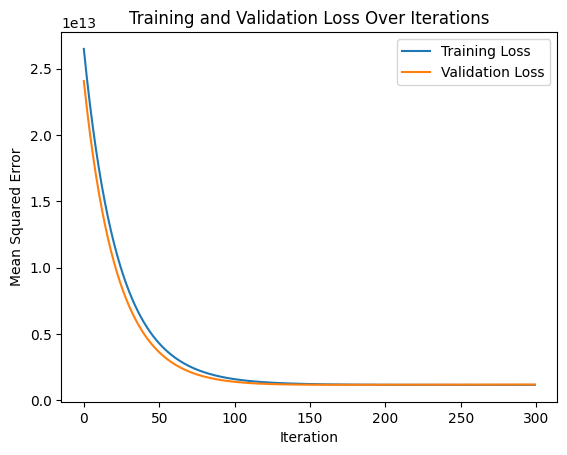

In [647]:
# Calculate the training and validation losses then plot them
train_losses_3a_s, val_losses_3a_s, theta_3a_s = compute_losses_with_penalty(x_b_train=x_b_train_3a_s, x_b_val=x_b_val_3a_s, y_train=y_train_3a_s, y_val=y_val_3a_s, n_iterations=n_iterations_3a_s, theta=theta_3a_s)
plot_losses(train_losses=train_losses_3a_s, val_losses=val_losses_3a_s)

# Code for Problem 3b.

Normalization

In [648]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_3b_n = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_3b_n = df_train['price'].values.reshape(-1, 1)
x_val_3b_n = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_3b_n = df_test['price'].values.reshape(-1, 1)

# Scale the values
n_scaler = MinMaxScaler()
x_train_3b_n = n_scaler.fit_transform(x_train_3b_n)
x_val_3b_n = n_scaler.fit_transform(x_val_3b_n)

In [649]:
# Add a bias term
x_b_train_3b_n = np.c_[np.ones((len(x_train_3b_n), 1)), x_train_3b_n]
x_b_val_3b_n = np.c_[np.ones((len(x_val_3b_n), 1)), x_val_3b_n]

# Initialize theta with 12 features (including bias term)
theta_3b_n = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_3b_n = 300
m = len(x_b_train_3b_n)

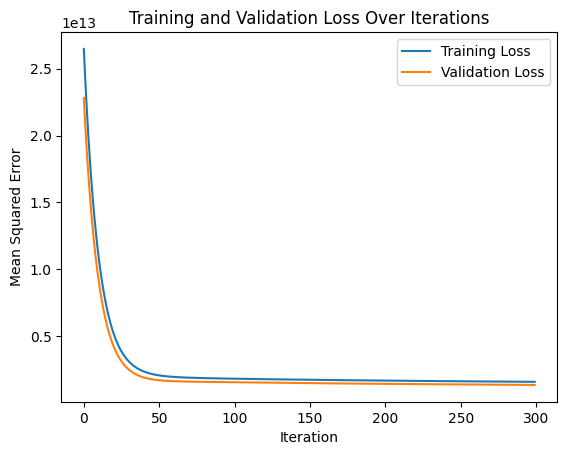

In [650]:
# Calculate the training and validation losses then plot them
train_losses_3b_n, val_losses_3b_n, theta_3b_n = compute_losses_with_penalty(x_b_train=x_b_train_3b_n, x_b_val=x_b_val_3b_n, y_train=y_train_3b_n, y_val=y_val_3b_n, n_iterations=n_iterations_3b_n, theta=theta_3b_n)
plot_losses(train_losses=train_losses_3b_n, val_losses=val_losses_3b_n)

Standardization

In [651]:
# Split the data into training and validation sets
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
x_train_3b_s = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_train_3b_s = df_train['price'].values.reshape(-1, 1)
x_val_3b_s = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y_val_3b_s = df_test['price'].values.reshape(-1, 1)

# Scale the values
s_scaler = StandardScaler()
x_train_3b_s = s_scaler.fit_transform(x_train_3b_s)
x_val_3b_s = s_scaler.fit_transform(x_val_3b_s)

In [652]:
# Add a bias term
x_b_train_3b_s = np.c_[np.ones((len(x_train_3b_s), 1)), x_train_3b_s]
x_b_val_3b_s = np.c_[np.ones((len(x_val_3b_s), 1)), x_val_3b_s]

# Initialize theta with 12 features (including bias term)
theta_3b_s = np.zeros((12, 1))

# Regression parameters
learning_rate = 0.01
n_iterations_3b_s = 300
m = len(x_b_train_3b_s)
lambd = 5

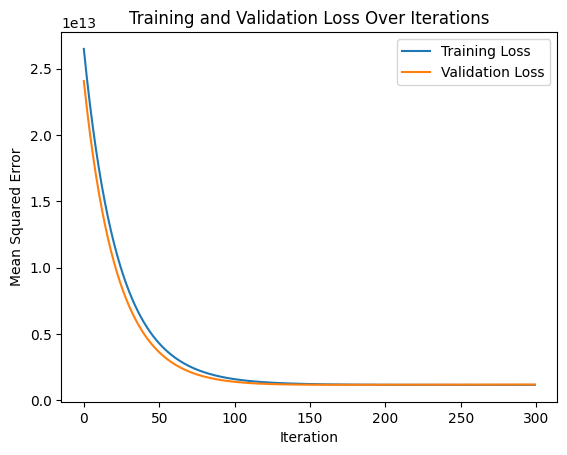

In [653]:
# Calculate the training and validation losses then plot them
train_losses_3b_s, val_losses_3b_s, theta_3b_s = compute_losses_with_penalty(x_b_train=x_b_train_3b_s, x_b_val=x_b_val_3b_s, y_train=y_train_3b_s, y_val=y_val_3b_s, n_iterations=n_iterations_3b_s, theta=theta_3b_s)
plot_losses(train_losses=train_losses_3b_s, val_losses=val_losses_3b_s)